In [77]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import mplcursors as mpl
%matplotlib inline

In [123]:
shopify = yf.download("SHOP.TO",start = '2008-01-01', end='2023-04-29')
nuvei = yf.download("NVEI.TO",start = '2008-01-01', end='2023-04-29')
loblaw= yf.download("L.TO",start = '2008-01-01', end='2023-04-29')
goeasy = yf.download("GSY.TO",start = '2008-01-01', end='2023-04-29')
brp = yf.download("DOO.TO",start = '2008-01-01', end='2023-04-29')
atd = yf.download("ATD.TO",start = '2008-01-01', end='2023-04-29')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


(16801.0, 19723.0)

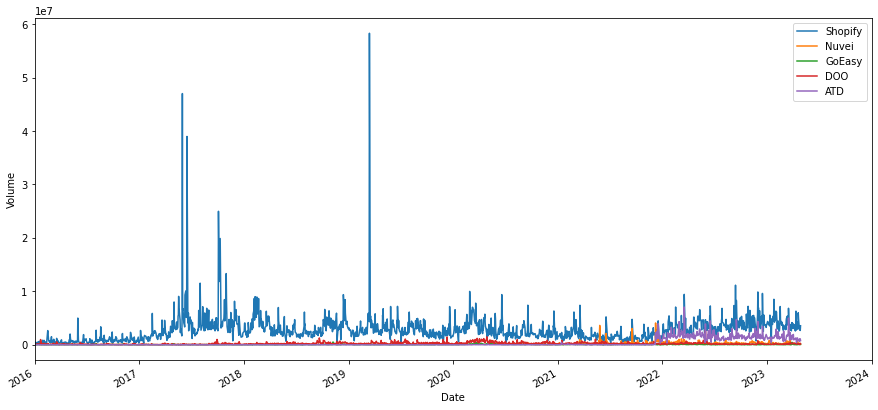

In [79]:
shopify["Volume"].plot(label = "Shopify", figsize = (15,7))
nuvei["Volume"].plot(label = "Nuvei", figsize = (15,7))
goeasy["Volume"].plot(label = "GoEasy", figsize = (15,7))
brp["Volume"].plot(label = "DOO", figsize = (15,7))
atd["Volume"].plot(label = "ATD", figsize = (15,7))
plt.legend()
plt.ylabel("Volume")
plt.xlim("2016","2024")

In [80]:
shopify.iloc[[shopify['Volume'].argmax()]]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-15,27.865,27.957001,27.174,27.341999,27.341999,58294000


In [81]:
shopify["Volume"].argmax()

958

Day when trading volume was the highest in the stocks history

Text(0, 0.5, 'Stock Price')

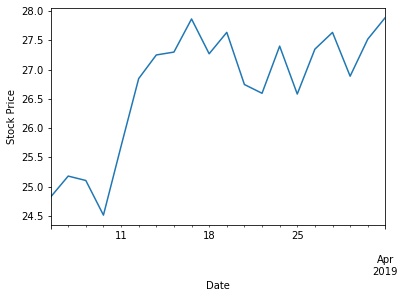

In [82]:
shopify.iloc[950:970]["Open"].plot()
plt.ylabel("Stock Price")

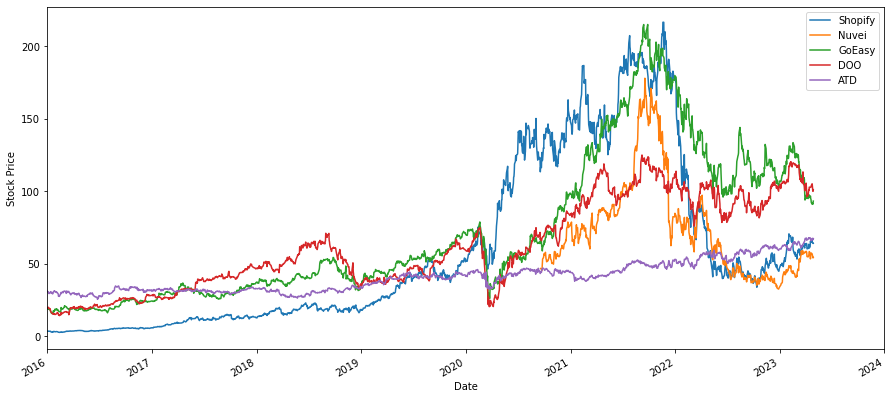

In [83]:
shopify["Open"].plot(label = "Shopify", figsize = (15,7))
nuvei["Open"].plot(label = "Nuvei", figsize = (15,7))
goeasy["Open"].plot(label = "GoEasy", figsize = (15,7))
brp["Open"].plot(label = "DOO", figsize = (15,7))
atd["Open"].plot(label = "ATD", figsize = (15,7))
plt.legend()
plt.xlim("2016","2024")
plt.ylabel("Stock Price")
mpl.cursor(hover=True)

In [84]:
from pandas.plotting import scatter_matrix
import pandas as pd

In [85]:
comp = pd.concat([shopify['Open'],nuvei['Open'],goeasy['Open'],brp['Open'],atd['Open']], axis = 1,)
comp.columns = ['Shopify Open', 'Nuvei Open', 'GoEasy Open', 'BRP Open', 'ATD Open']

array([[<AxesSubplot:xlabel='Shopify Open', ylabel='Shopify Open'>,
        <AxesSubplot:xlabel='Nuvei Open', ylabel='Shopify Open'>,
        <AxesSubplot:xlabel='GoEasy Open', ylabel='Shopify Open'>,
        <AxesSubplot:xlabel='BRP Open', ylabel='Shopify Open'>,
        <AxesSubplot:xlabel='ATD Open', ylabel='Shopify Open'>],
       [<AxesSubplot:xlabel='Shopify Open', ylabel='Nuvei Open'>,
        <AxesSubplot:xlabel='Nuvei Open', ylabel='Nuvei Open'>,
        <AxesSubplot:xlabel='GoEasy Open', ylabel='Nuvei Open'>,
        <AxesSubplot:xlabel='BRP Open', ylabel='Nuvei Open'>,
        <AxesSubplot:xlabel='ATD Open', ylabel='Nuvei Open'>],
       [<AxesSubplot:xlabel='Shopify Open', ylabel='GoEasy Open'>,
        <AxesSubplot:xlabel='Nuvei Open', ylabel='GoEasy Open'>,
        <AxesSubplot:xlabel='GoEasy Open', ylabel='GoEasy Open'>,
        <AxesSubplot:xlabel='BRP Open', ylabel='GoEasy Open'>,
        <AxesSubplot:xlabel='ATD Open', ylabel='GoEasy Open'>],
       [<AxesSubplot:xlab

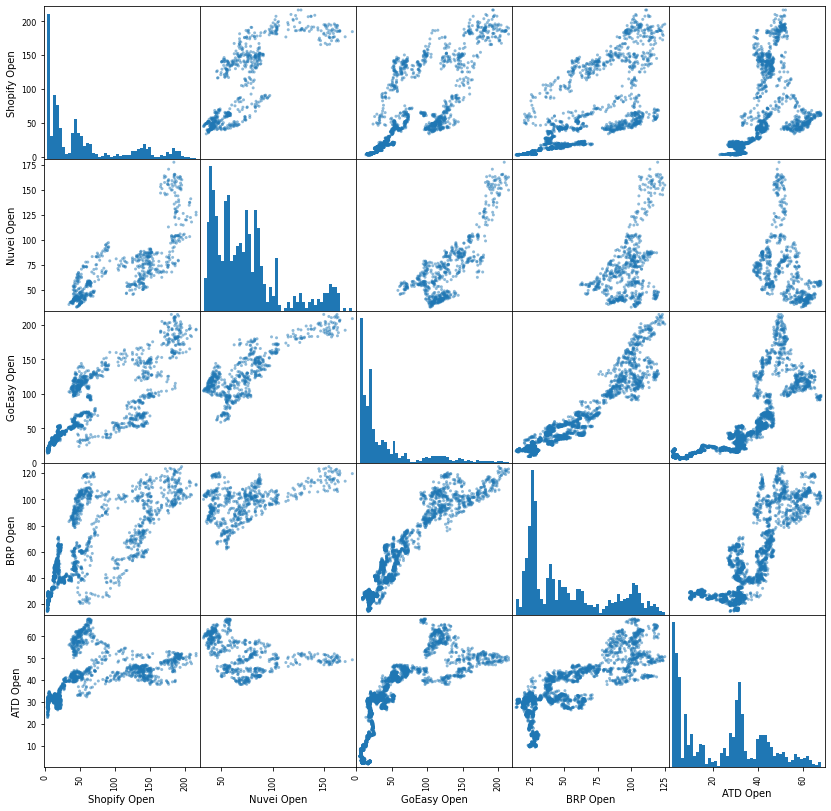

In [86]:
scatter_matrix(comp,figsize = (14,14),hist_kwds = {'bins':50})

DAILY PERCENTAGE CHANGE
$r_{t}=(P_{t}/P_{t-1})-1$

In [128]:
shopify['returns'] = (shopify['Close']/shopify['Close'].shift(1))-1
nuvei['returns1'] = (nuvei['Close']/nuvei['Close'].shift(1))-1
goeasy['returns2'] = (goeasy['Close']/goeasy['Close'].shift(1))-1
brp['returns3'] = (brp['Close']/brp['Close'].shift(1))-1
atd['returns4'] = (atd['Close']/atd['Close'].shift(1))-1

(-0.2, 0.2)

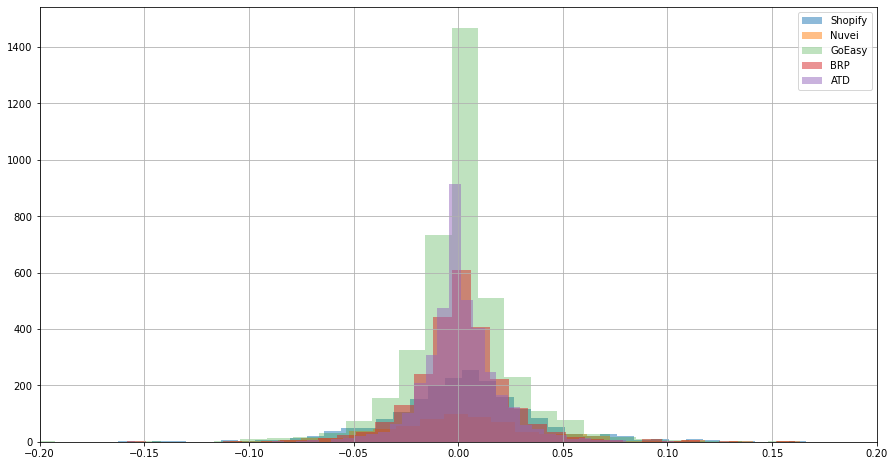

In [129]:
shopify['returns'].hist(bins=50, label='Shopify',alpha=0.5, figsize = (15,8))
nuvei['returns1'].hist(bins=50, label='Nuvei',alpha=0.5)
goeasy['returns2'].hist(bins=50, label='GoEasy',alpha=0.3)
brp['returns3'].hist(bins=50, label='BRP',alpha=.5)
atd['returns4'].hist(bins=50, label='ATD',alpha=0.5)
plt.legend()
plt.xlim(-0.2,0.2)

(-0.2, 0.2)

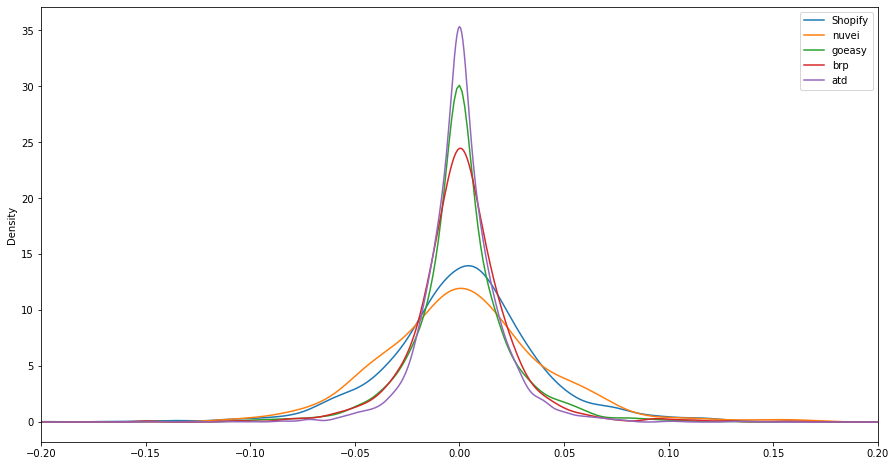

In [130]:
shopify['returns'].plot(kind='kde',label='Shopify', figsize = (15,8))
nuvei['returns1'].plot(kind='kde',label='nuvei')
goeasy['returns2'].plot(kind='kde',label='goeasy')
brp['returns3'].plot(kind='kde',label='brp')
atd['returns4'].plot(kind='kde',label='atd')
plt.legend()
plt.xlim(-0.2,0.2)

Probability density function, this one is normalized. The densities are constant and a better comparison. Fatter curves mean more volatile. 

<AxesSubplot:>

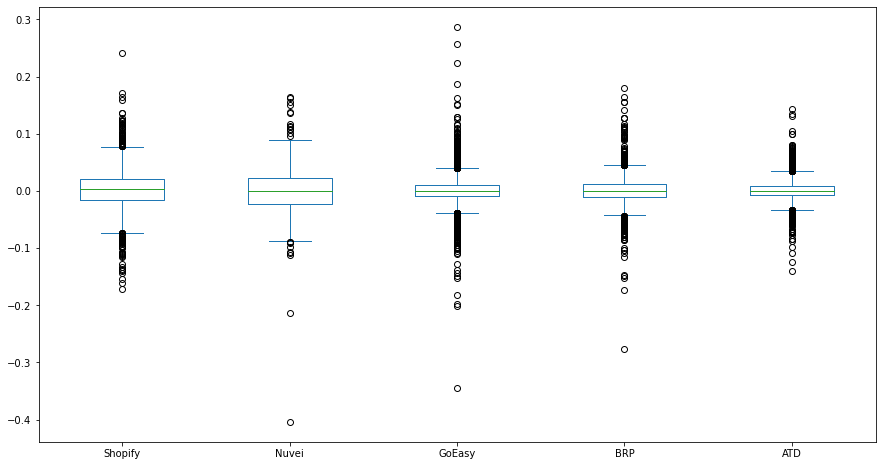

In [136]:
box_df = pd.concat([shopify['returns'],nuvei['returns1'],goeasy['returns2'],brp['returns3'],atd['returns4']], axis =1)
box_df.columns=['Shopify','Nuvei','GoEasy','BRP','ATD']
box_df.plot(kind='box', figsize = (15,8))


array([[<AxesSubplot:xlabel='Shopify', ylabel='Shopify'>,
        <AxesSubplot:xlabel='Nuvei', ylabel='Shopify'>,
        <AxesSubplot:xlabel='GoEasy', ylabel='Shopify'>,
        <AxesSubplot:xlabel='BRP', ylabel='Shopify'>,
        <AxesSubplot:xlabel='ATD', ylabel='Shopify'>],
       [<AxesSubplot:xlabel='Shopify', ylabel='Nuvei'>,
        <AxesSubplot:xlabel='Nuvei', ylabel='Nuvei'>,
        <AxesSubplot:xlabel='GoEasy', ylabel='Nuvei'>,
        <AxesSubplot:xlabel='BRP', ylabel='Nuvei'>,
        <AxesSubplot:xlabel='ATD', ylabel='Nuvei'>],
       [<AxesSubplot:xlabel='Shopify', ylabel='GoEasy'>,
        <AxesSubplot:xlabel='Nuvei', ylabel='GoEasy'>,
        <AxesSubplot:xlabel='GoEasy', ylabel='GoEasy'>,
        <AxesSubplot:xlabel='BRP', ylabel='GoEasy'>,
        <AxesSubplot:xlabel='ATD', ylabel='GoEasy'>],
       [<AxesSubplot:xlabel='Shopify', ylabel='BRP'>,
        <AxesSubplot:xlabel='Nuvei', ylabel='BRP'>,
        <AxesSubplot:xlabel='GoEasy', ylabel='BRP'>,
        <AxesSub

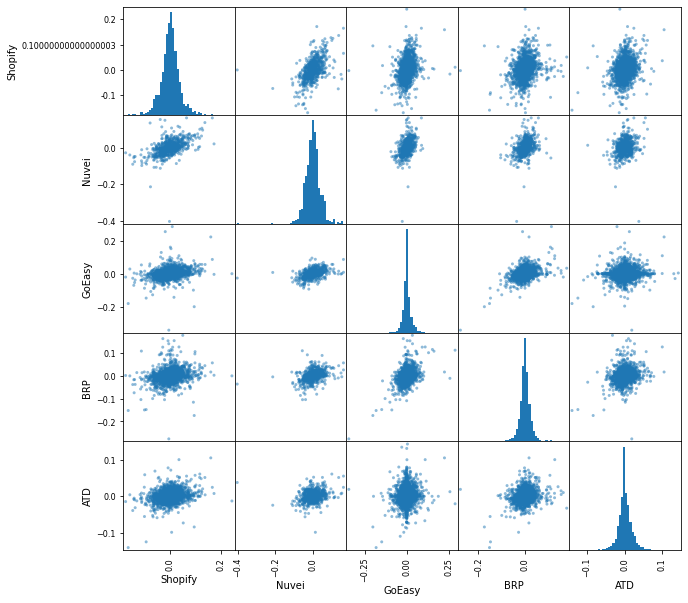

In [139]:
scatter_matrix(box_df,figsize=(10,10),hist_kwds={'bins':50})

Correlation of the stocks in terms of volatility